<a href="https://colab.research.google.com/github/Hanbi-Kim/IntroToPython/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df = pd.read_excel("더베트맨영화리뷰.xlsx", index_col=0)
df

,영화 리뷰,영화 평점
0,느와르풍 탐정물이 되어버린 배트맨호불호가 있을수있는 상영시간,8
1,스파이더맨 홈커밍같은 느낌이다. 근데 진짜 더럽게 멋지네...,10
2,"깊은 연기, 잘 벼려낸 영상미 덕분에 고담 시의 시민이 된 3시간.극장을 나오며 위...",10
3,잔잔한듯 느리게 느껴지지만 그 안에는 이미 꽉찬 내용이 들어있다.끝까지 집중해서 볼...,9
4,연기는 좋았지만내가 알던 브루스 웨인은 죽었다,2
...,...,...
270,음악과 연출 영상이 훌륭해서 재밌게 봤습니다 액션도 장비빨이 아니라서 더 몰입하게 ...,10
271,웅장한척 하고 싶어하는 영화.졸렬해요ㅠ,1
272,마블스타일 히어로물 기대하면 비추디씨스타일(호아킨 조커) 느와르 기대하면 극추,8
273,다크나이트보다는 못해도 다른 배트맨영화보다 괜찮아요,10


In [5]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad

In [6]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [8]:
import konlpy
from konlpy.tag import Okt

#객체 생성
okt = Okt()

In [11]:
text = "okt 형태소 분석기를 사용하여 해당 문장을 분석해봅시다."
okt.pos(text)


[('okt', 'Alpha'),
 ('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('기를', 'Verb'),
 ('사용', 'Noun'),
 ('하여', 'Verb'),
 ('해당', 'Noun'),
 ('문장', 'Noun'),
 ('을', 'Josa'),
 ('분석', 'Noun'),
 ('해봅시다', 'Verb'),
 ('.', 'Punctuation')]

In [12]:
# 명사만 추출하기
okt.nouns(text)

['형태소', '분석', '사용', '해당', '문장', '분석']

In [14]:
# 첫번째 영화 리뷰
df["영화 리뷰"].loc[0]

'느와르풍 탐정물이 되어버린 배트맨호불호가 있을수있는 상영시간 '

In [15]:
# 첫번째 영화 리뷰에서 명사만 추출하기
okt.nouns(df["영화 리뷰"].loc[0])

['느와르', '탐정물', '배트맨', '호불호', '상영', '시간']

In [16]:
noun_list = []
for i in range(len(df)):
  noun_list.append(okt.nouns(df["영화 리뷰"].loc[i]))

In [21]:
# 두번째 영화 리뷰
df["영화 리뷰"].loc[1]

'스파이더맨 홈커밍같은 느낌이다. 근데 진짜 더럽게 멋지네... '

In [22]:
# 두번째 영화 리뷰 명사 추출
noun_list[1]

['스파이더맨', '홈', '커밍', '느낌', '진짜']

In [24]:
total_word = []
for i in range(len(noun_list)):
  for j in range(len(noun_list[i])):
    total_word.append(noun_list[i][j])

In [26]:
total_word[:10]

['느와르', '탐정물', '배트맨', '호불호', '상영', '시간', '스파이더맨', '홈', '커밍', '느낌']

In [27]:
len(total_word)

3017

In [30]:
import collections
counter = collections.Counter(total_word)
counter.most_common(30)

[('배트맨', 163),
 ('영화', 123),
 ('더', 35),
 ('히어로', 33),
 ('진짜', 29),
 ('다크나이트', 28),
 ('액션', 28),
 ('수', 26),
 ('연출', 26),
 ('분위기', 25),
 ('스토리', 25),
 ('시간', 24),
 ('생각', 24),
 ('그', 23),
 ('느낌', 22),
 ('시리즈', 18),
 ('것', 17),
 ('점', 17),
 ('연기', 16),
 ('볼', 16),
 ('이', 16),
 ('정도', 16),
 ('작품', 16),
 ('감독', 16),
 ('놀란', 16),
 ('캐릭터', 16),
 ('최고', 15),
 ('다른', 15),
 ('그냥', 15),
 ('다크', 14)]

In [35]:
! apt-get update -qq
! apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155911 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [37]:
import matplotlib.font_manager as fm 
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fon

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
words = dict(counter.most_common())

wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

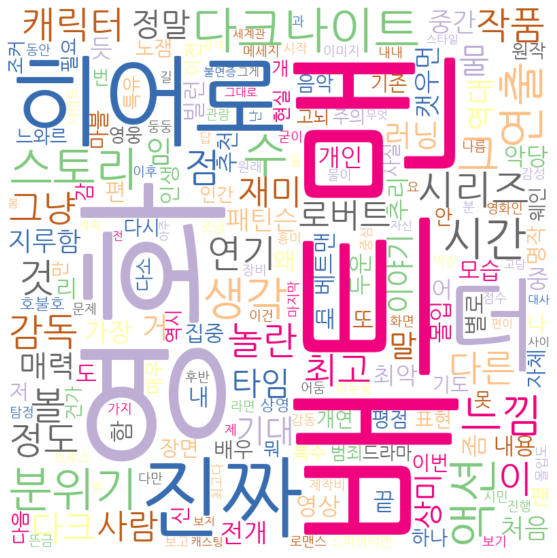

In [41]:
array = wordcloud_words.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()

In [45]:
from PIL import Image
import numpy as np
img = Image.open('batman.png')
img_array = np.array(img)

In [59]:

words = dict(counter.most_common())

wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='black',                         # 배경 색깔 정하기 예제: ['white','black']
    colormap = 'PuBu',                                # 폰트 색깔 정하기 예제:['spring', 'summer', 'seismic','PuBu']
    width = 2400,
    height = 800,
    mask=img_array
)

wordcloud_words = wordcloud.generate_from_frequencies(words)
array = wordcloud_words.to_array()

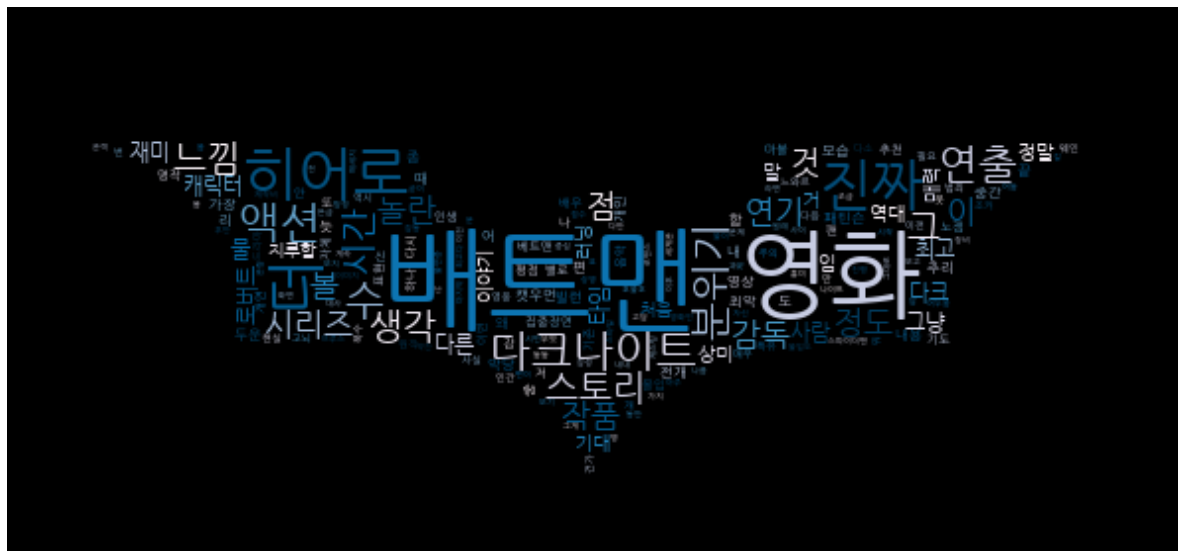

In [60]:
fig = plt.figure(figsize=(25, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()